# Анализ сервиса аренды самокатов

Сервис по аренде самокатов GoFast попросил меня проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Я сделал все возможное, чтобы провести всесторонний, но не исчерпывающий анализ данных.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
- абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
Моя работа по анализу данных GoFast состоит из следующих шагов:
1. Загрузка данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Объединение данных.
5. Подсчёт выручки.
6. Проверка гипотез.
7. Общие выводы.

In [1]:
# Импортируем все нужные библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы

In [2]:
try:
    user_go = pd.read_csv('/datasets/users_go.csv')
    rides_go = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    user_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

##### Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [3]:
display(user_go.head())
display(user_go.info())
print('Количество дубликатов', user_go.duplicated().sum())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

Количество дубликатов 31


In [4]:
display(rides_go.head())
display(rides_go.info())
print('Количество дубликатов', rides_go.duplicated().sum())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

Количество дубликатов 0


In [5]:
display(subscriptions_go.head())
display(subscriptions_go.info())
print('Количество дубликатов', subscriptions_go.duplicated().sum())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

Количество дубликатов 0


Вывод: В данных нет пропусков и все столбцы именованы корректрно, однако в данных 'user_go' 31 дубликат.


#### Шаг 2. Предобработка данных

##### Приводим столбец date к типу даты pandas.

In [6]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

##### Создадим новый столбец с номером месяца на основе столбца date.

In [7]:
rides_go['month'] = rides_go['date'].dt.month

##### Обработаем дубликаты.

In [8]:
user_go = user_go.drop_duplicates()

In [9]:
print('Количество дубликатов', user_go.duplicated().sum())

Количество дубликатов 0


Вывыод:
1. Удалили дубликаты
2. Создали столбец в 'rides_go'
3. Привели столбца 'date' к типу данных даты

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов.

Text(0, 0.5, 'Количество')

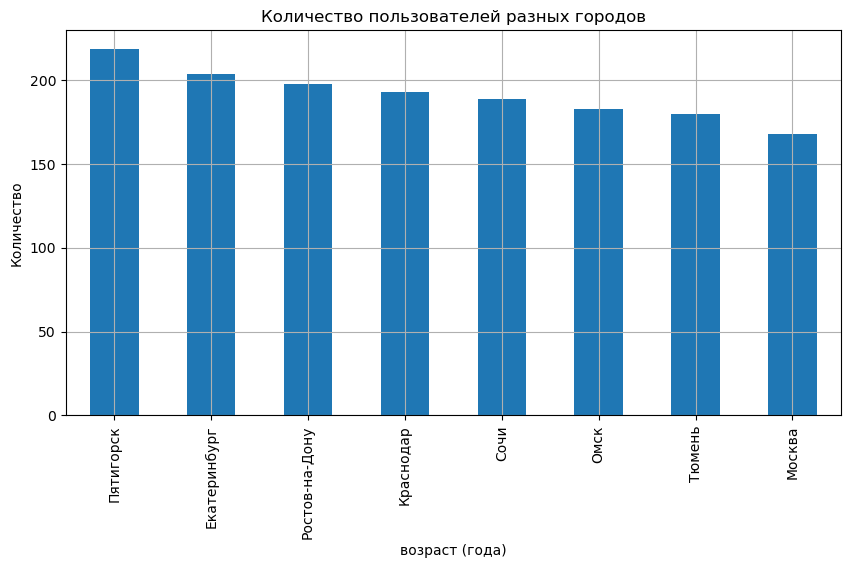

In [10]:
user_go['city'].value_counts().plot(kind='bar',
                                    title='Количество пользователей разных городов', 
                                    grid=True,
                                    figsize=(10, 5))

plt.xlabel('возраст (года)')
plt.ylabel('Количество')

##### Соотношение пользователей с подпиской и без подписки

<Axes: title={'center': 'Возраст пользователей'}, ylabel='subscription_type'>

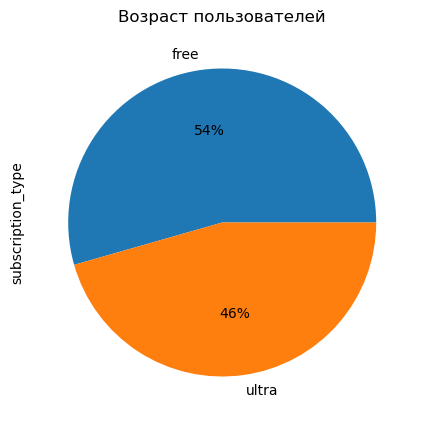

In [11]:
user_go.groupby(by='subscription_type')['subscription_type'].count().plot(kind='pie', autopct='%1.0f%%', title='Возраст пользователей', figsize=(9, 5))

##### Возраст пользователей.

Text(0, 0.5, 'Количество')

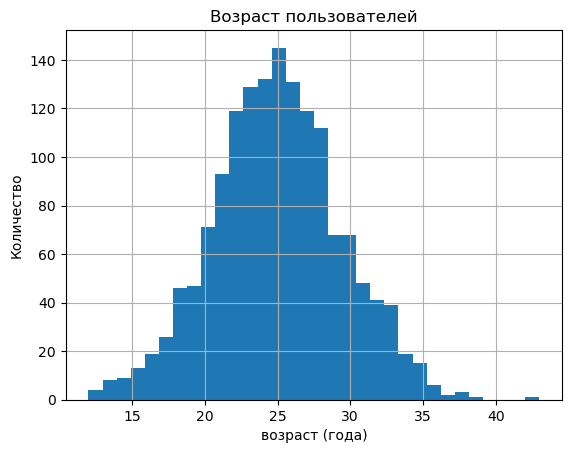

In [12]:
plt.hist(user_go['age'], bins=32)
plt.grid(which='major')
plt.title('Возраст пользователей')
plt.xlabel('возраст (года)')
plt.ylabel('Количество')

In [13]:
user_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

##### Расстояние, которое пользователь преодолел за одну поездку.

Text(0, 0.5, 'Количество')

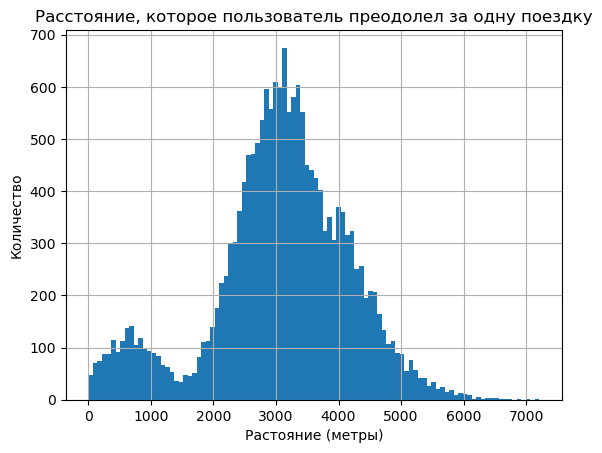

In [14]:
plt.hist(rides_go['distance'], bins=100)
plt.grid(which='major')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Растояние (метры)')
plt.ylabel('Количество')

In [15]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

##### Продолжительность поездок.

Text(0, 0.5, 'Количество')

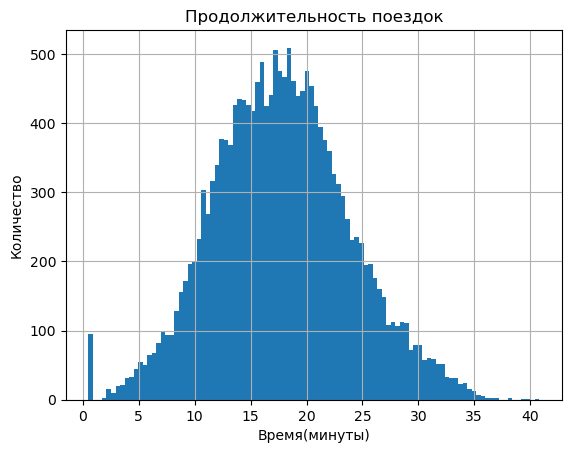

In [16]:
plt.hist(rides_go['duration'], bins=100)
plt.grid(which='major')
plt.title('Продолжительность поездок')
plt.xlabel('Время(минуты)')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

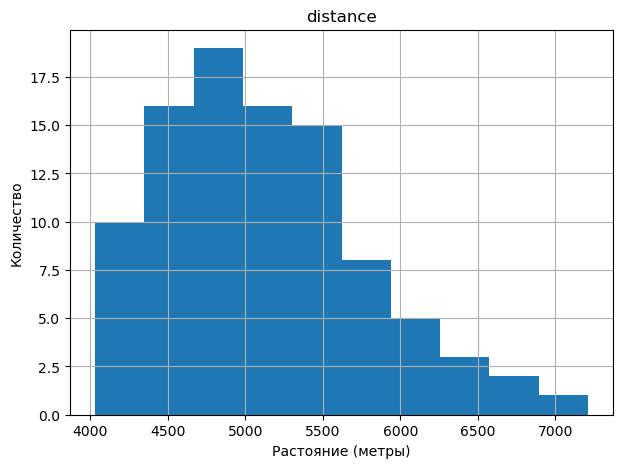

In [17]:
# 
rides_go[rides_go['duration'] < 2].hist('distance', figsize=(7, 5))
plt.xlabel('Растояние (метры)')
plt.ylabel('Количество')

In [18]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [19]:
#rides_go = rides_go[rides_go['duration'] > 2]

Text(0, 0.5, 'Количество')

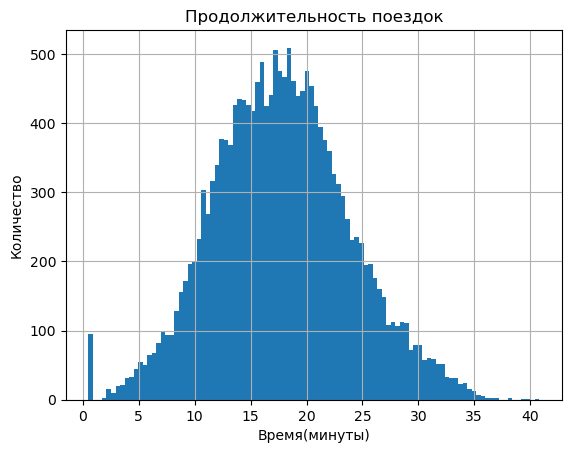

In [20]:
plt.hist(rides_go['duration'], bins=100)
plt.grid(which='major')
plt.title('Продолжительность поездок')
plt.xlabel('Время(минуты)')
plt.ylabel('Количество')

Вывод: 
1. Услугами сервиса аренды самокатов пользуются больше всего в Пятигорске, на второй месте оказался Екатеринбург.
2. Людей без подписки на 8% больше чем с подпиской.
3. Основная группа людей пользующаяся прокатом самокатов это люди от 22 до 28 лет
4. Медиана поездок находится на 3133 метров первый квартиль находится на значении 2543 метра, третий квартиль на 3776 метров. Можно предположить, что люди пользуются самокатами не только на длинные маршруты, но и на короткие растояния(напрмер: когда устали ходить пешком)
5. Медиана поездок находится на 18 мин первый квартиль находится на значении 14 мин, третий квартиль на 22 мин. Были замечены аномальные значения(при поездках меньше 2 минут растояние 4-7 км)

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [21]:
data_go = pd.merge(user_go, rides_go, how='left')
data_go = pd.merge(data_go, subscriptions_go, how='left')

In [22]:
data_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [23]:
data_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [24]:
data_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


##### Создадим ещё два датафрейма с подпиской и без.

In [25]:
#Датафрейм с подпиской.
subscription_on = data_go[data_go['subscription_type'] == 'ultra']

In [26]:
#Датафрейм безподписки.
subscription_off = data_go[data_go['subscription_type'] == 'free']

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Text(0, 0.5, 'Количество')

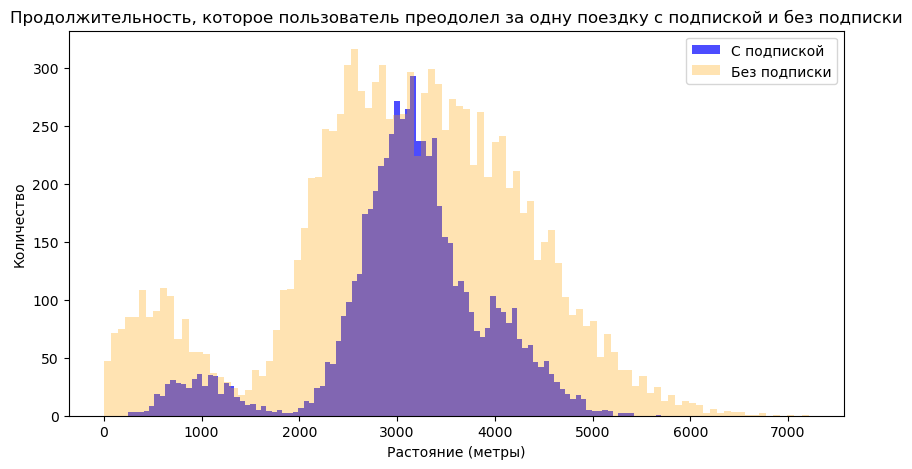

In [27]:
# Оранжевый без подписки, синий с подпиской
subscription_on['distance'].plot(kind='hist', bins=100,
                                 title='Продолжительность, которое пользователь преодолел за одну поездку с подпиской и без подписки',
                                 figsize=(10, 5), alpha = 0.7, color='blue' )

subscription_off['distance'].plot(kind='hist', bins=100,
                                  figsize=(10, 5), alpha = 0.3, color='orange')

plt.legend(["С подпиской", "Без подписки"], loc="upper right")
plt.xlabel('Растояние (метры)')
plt.ylabel('Количество')

In [28]:
subscription_on['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [29]:
subscription_off['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Количество')

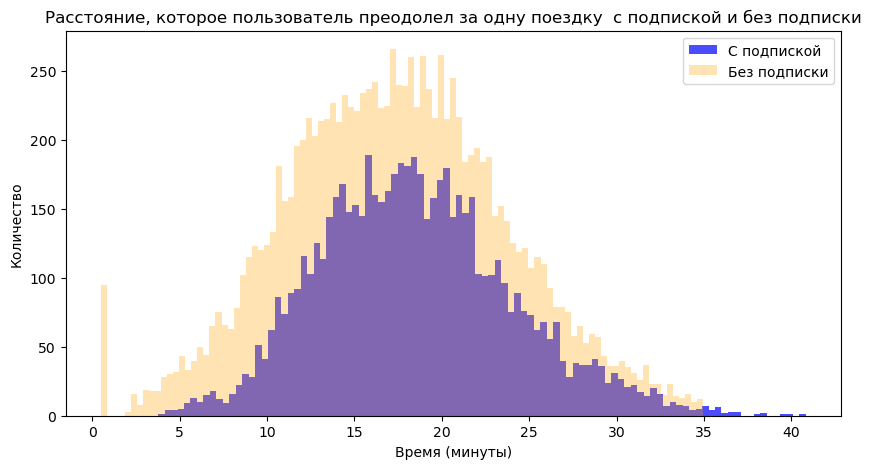

In [30]:
# Оранжевый без подписки, синий с подпиской
subscription_on['duration'].plot(kind='hist', bins=100,
                                 title='Расстояние, которое пользователь преодолел за одну поездку  с подпиской и без подписки',
                                 figsize=(10, 5), alpha = 0.7, color='blue' )

subscription_off['duration'].plot(kind='hist', bins=100,
                                  figsize=(10, 5), alpha = 0.3, color='orange')
plt.legend(["С подпиской", "Без подписки"], loc="upper right")
plt.xlabel('Время (минуты)')
plt.ylabel('Количество')

In [31]:
subscription_on['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [32]:
subscription_off['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Вывод:Данные указывают на то, что люди с подпиской чаще едут дальше на 46 метров, и на 1 минуту дольше.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [33]:
data_go['duration'] = np.ceil(data_go['duration']) 

In [34]:
user_month = data_go.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee',),
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean'})
)

user_month.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee']


In [35]:
user_month.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0           6.0               0.0   
        4          1   754.159807       7.0           6.0               0.0   
        8          2  6723.470560      46.0           6.0               0.0   
        10         2  5809.911100      32.0           6.0               0.0   
        11         3  7003.499363      56.0           6.0               0.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0

In [36]:
data_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [37]:
user_month['revenue'] = user_month['start_ride_price']*user_month['count'] + user_month['minute_price'] * user_month['duration'] + user_month['subscription_fee']

In [38]:
print('Выручка за 2021 год составила :',user_month['revenue'].sum(), 'руб.')

Выручка за 2021 год составила : 3878641.0 руб.


#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Выдвинем гипотезы:

- Н0: Средняя продолжительность поездок с подпиской ultra и без free равна
- Н1: Средняя продолжительность поездок с подпиской ultra больше продолжительности поездок без подписок free

In [39]:
alpha = 0.05

results = st.ttest_ind(
    subscription_on['duration'], 
    subscription_off['duration'], 
    equal_var=True, 
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Вывод: Нулевая гипотеза отвергнута, вероятно средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки.

#####  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Выдвинем гипотезы:

- Н0: Среднее расстояние поездок с подпиской ultra равно оптимальному расстоянию в 3130 метров.
- Н1: Среднее расстояние поездок с подпиской ultra больше оптимального в 3130 метров.

In [40]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    subscription_on['distance'], 
    distance,
    alternative='greater')

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Вывод: Нулевую гипотезу не получилось отвергнуть, есть основания утверждать, что среднее расстояние поездки,
пользователей с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Выдвинем гипотезы:

- Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.
- Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

In [41]:
alpha = 0.05
results = st.ttest_ind(
    user_month.loc[user_month['subscription_fee'] > 0, 'revenue'], 
    user_month.loc[user_month['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод: Нулевая гипотеза отвергнута, есть основания утверждать, что средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки.

##### Разберем такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам  понадобился бы для проверки этой гипотезы?

Это две зависимые выборки, поэтому можем использовать метод 'scipy.stats.ttest_rel()' при проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности.

#### Общий вывод:


- Изучены и описаны параметры:
    - Услугами сервиса аренды самокатов пользуются больше всего в Пятигорске, на второй месте оказался Екатеринбург.
    - Людей без подписки на 8% больше чем с подпиской.
    - Основная группа людей пользующаяся прокатом самокатов это люди от 22 до 28 лет
    - Медиана поездок находится на 3133 метров первый квартиль находится на значении 2543 метра, третий квартиль на 3776 метров. Можно предположить, что люди пользуются самокатами не только на длинные маршруты, но и на короткие растояния(напрмер: когда устали ходить пешком)
    - Медиана поездок находится на 18 мин первый квартиль находится на значении 14 мин, третий квартиль на 22 мин. Были замечены аномальные значения(при поездках меньше 2 минут растояние 4-7 км)
    - Люди с подпиской чаще едут дальше на 46 метров, и на 1 минуту дольше.

- Подсчёт выручки:
    - Выручка сервиса аренды самокатов "GoFast" за год составила 3 853 677.0руб.

- Проверка гипотез

    - Нулевая гипотеза отвергнута, вероятно средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки.
    - Нулевую гипотезу не получилось отвергнуть, есть основания утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает расстояние в 3130 метров с точки зрения износа самоката.
    - Нулевая гипотеза отвергнута, есть основания утверждать, что средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки.
    - Дано пояснение о необходимости применения метода scipy.stats.ttest_rel(), для сравнения зависимых выборок.